# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Limiarização de Imagens

Nos vídeos abaixo, eu discuto o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
# Resolução

import numpy as np
import cv2, time

def onChange(value):
    #print("Valor da limiarização foi alterado para: ", value)
    pass

img = cv2.imread("melanoma.png")
copiaImg = img.copy()

windowTitle = "Tarefa 05 - Limiarizacao"
cv2.namedWindow(windowTitle)

# Trackbar
cv2.createTrackbar("Limiarizacao", windowTitle, 100, 255, onChange)

limiar_inicial = 100;
limiar_atualizado = False

cont_tempo = 0

while True:
    limiar_recebido = cv2.getTrackbarPos("Limiarizacao", windowTitle)

    # valor da limiarização foi alterada pelo usuário
    if limiar_inicial != limiar_recebido:
        limiar_atualizado = True
        counter_time = time.time()
        limiar_inicial = limiar_recebido

    # atualizar a limiarização apenas após 1 segundo de mudança
    if limiar_atualizado == True and (time.time() - cont_tempo) > 1:
        copiaImg = img.copy()

        height, width, channels = img.shape
        
        limiar_recebido, copiaImg =  cv2.threshold(img, limiar_recebido, 255, cv2.THRESH_BINARY)

        limiar_atualizado = False        
    
    cv2.imshow(windowTitle,copiaImg)

    keyPressed = cv2.waitKey(1) & 0xFF
    if keyPressed == 27:
        break


cv2.destroyAllWindows()

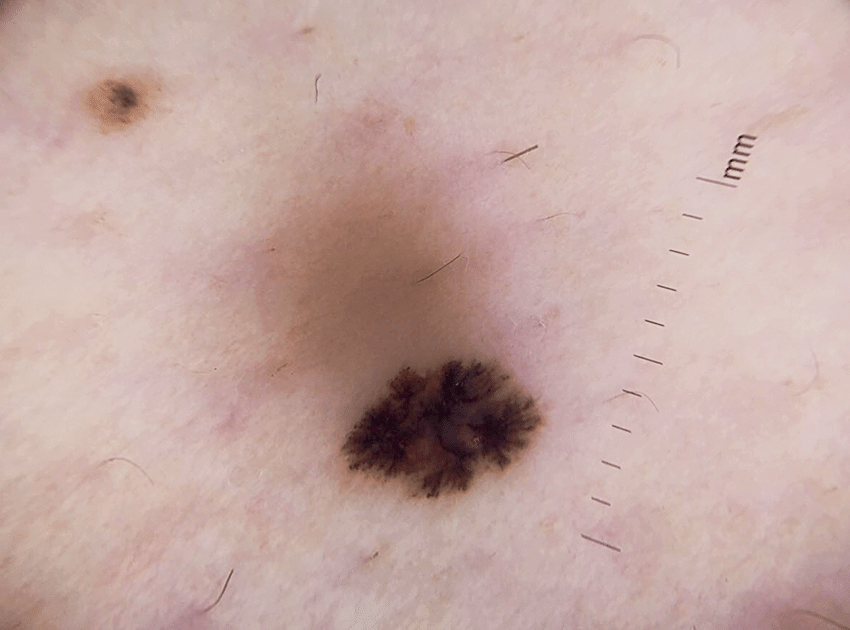

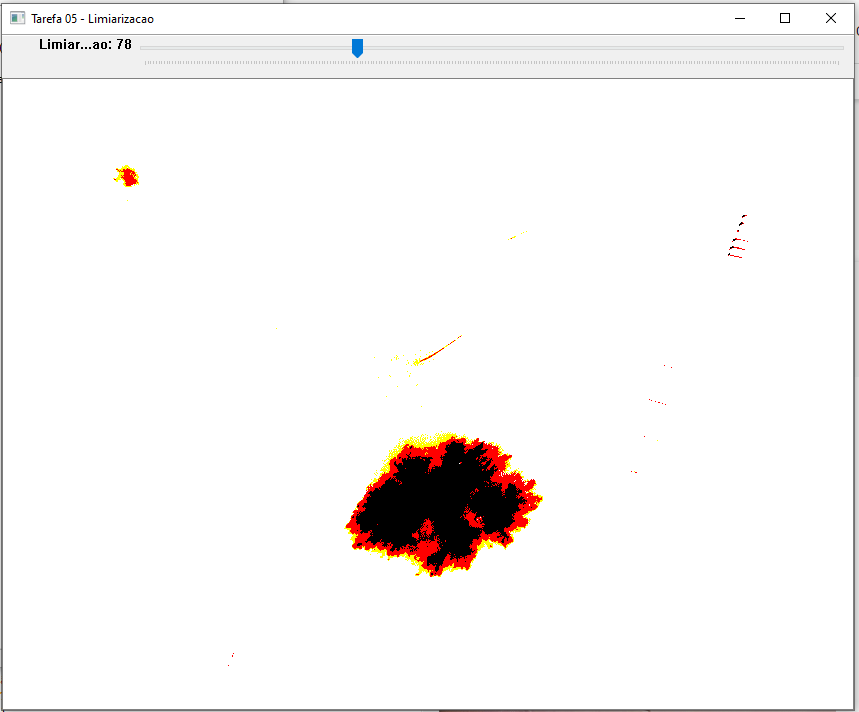

#2. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>

Explique com suas palavras no áudio qual foi o efeito e quando cada filtro deve ser aplicado.

Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

In [ ]:
# Resolução

import numpy as np
import cv2
from matplotlib import pyplot as plt

# y = linhas e x = colunas
def showMultipleImageGrid(imgsArray, titlesArray, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return

    fig, axis = plt.subplots(y, x)
    xId, yId, titleId = 0, 0, 0

    # para cada imagem do array
    for img in imgsArray:
        imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axis[yId, xId].set_title(titlesArray[titleId])
        axis[yId, xId].imshow(imgMPLIB)

        titleId += 1 # apos percorrer a primeira imagem, continua a sequencia
        xId += 1 # coluna primeiro

        if xId == x:
            xId = 0
            yId += 1

    fig.tight_layout(pad=0.5) # espaçamento
    plt.show()

def main():
    img = cv2.imread("morgana.jpg")

    media = cv2.blur(img,(9,9)) # faz a suavização da imagem a partir dos pixels da caixa 9x9
    gauss = cv2.GaussianBlur(img,(9,9),0) # faz a suavização da imagem, reduzindo o ruído e dando desfoque
    mediana = cv2.medianBlur(img,9) # despreza os valores muito altos ou muito baixos que podem distorcer o resultado

    # o sobel é direcional, então é preciso juntar o filtro horizontal e vertical
    # é preciso trabalhar com a imagem em ponto flutuante de 64 bits
    sobelX = cv2.Sobel(img,cv2.CV_64F,1,0)
    sobelY = cv2.Sobel(img,cv2.CV_64F,0,1)
    sobelX = np.uint8(np.absolute(sobelX))
    sobelY = np.uint8(np.absolute(sobelY))
    sobel = cv2.bitwise_or(sobelX,sobelY)

    # não exige processamento horizontal e vertical, mas trabalha com ponto flutuante
    laplace = cv2.Laplacian(img,cv2.CV_64F)
    laplace = np.uint8(np.absolute(laplace))

        
    imgsArray = [img, media, gauss, mediana, sobel, laplace] # array de imagens
    titlesArray = ['Imagem Inicial', 'Filtro - Média', 'Filtro - Gaussiana', 'Filtro - Mediana', 'Filtro - Sobel', 'Filtro - Laplaciano']
    showMultipleImageGrid(imgsArray, titlesArray, 3, 2)
    
main()

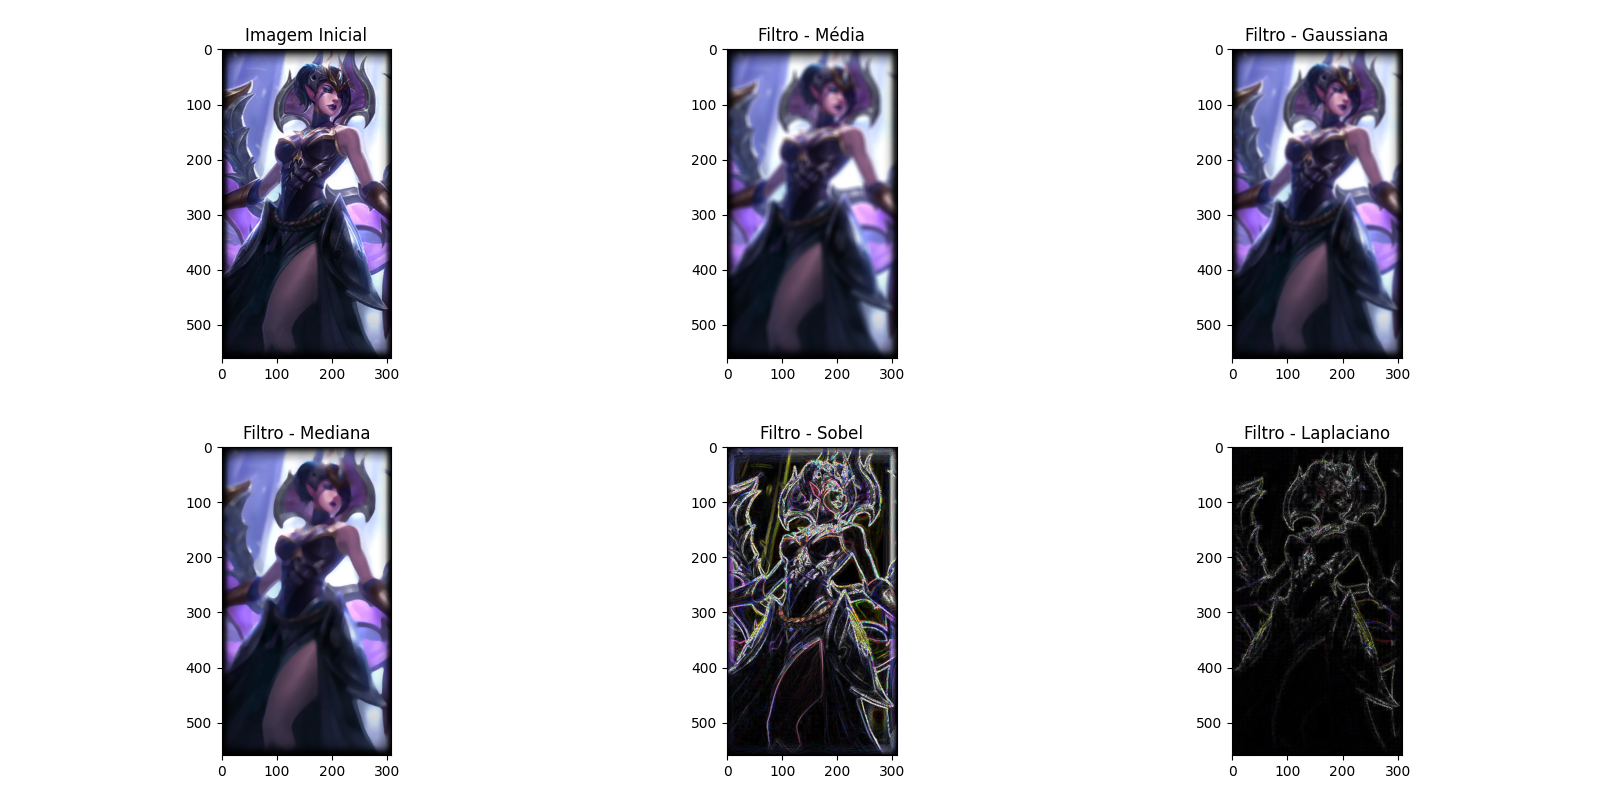

#3. Recapitulação

Acesse o SIGAA e no fórum "Recapitulação do Primeiro Mês", responda as seguintes perguntas com suas palavras:

* O que é o Processamento de Imagens?
* O que são modelos de cor (exemplo: RGB, HSV) e para que servem?
* Liste conhecimentos que você aprendeu até aqui e exemplo de uso dos mesmos.
